In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
Npeople = 100000

# generate the gender of the people M or F
gender = np.random.choice(['M', 'F'], Npeople)

# generate the height of the people
height = np.random.normal(170, 10, Npeople)

# generate the weight of the people
weight = np.random.normal(75, 15, Npeople)

# generate the age of the people
age = np.random.randint(18, 70, Npeople)

# generate a flag that says if the person is working or not: that is age dependent: 0 if age <18, growing linearly to 1 if 18 > age > 26, 1 otherwise

Pworking = np.zeros(Npeople)

Pworking[np.where((25 > age) & (age > 18))] = (age[np.where((25 > age) & (age > 18))] - 18) / ( 25-18 )
Pworking[np.where(age >= 25)] = 1

# generate a binary flag with 1 if the person is working and 0 otherwise, this is done by comparing the Pworking with a random number between 0 and 1

working = np.zeros(Npeople)
working[np.where(Pworking > np.random.rand(Npeople))] = 1


# generate the fraction of working per age group

bin_centers = np.arange(0, 70, 1)
fraction_working = np.zeros(len(bin_centers))
for i in range(len(bin_centers)):
    indx = np.where((age >= bin_centers[i]) & (age < bin_centers[i] + 1))
    if(len(indx[0]) > 0):
        fraction_working[i] = np.sum(working[indx[0]]) / len(indx[0])
    else:
        fraction_working[i] = 0


# generate a discrete multiplier between 1 and 7 for the salary of the people
Country_of_origin = np.random.randint(1, 5, Npeople)

# generate the salary of the people

# create variable K = 0 if gender == "M" and K = 1 if gender == "F"

K = np.zeros(Npeople)
K[np.where(gender == "M")] = 1


salary = 7000 * Country_of_origin * working * (age / 100 + 1) * (1*(K)+0.83*(1-K))

# add a multiplicative noise to the salary: people far from the average weight have a higher noise

salary = salary * np.random.normal(1, 0.1 * np.abs(weight - 75) / 75, Npeople)

# add a constant noise to the salary

salary = salary + 0.01*np.random.normal(0, 1000, Npeople)


In [3]:
def filter(data, filter):
    return data[np.where(filter)]

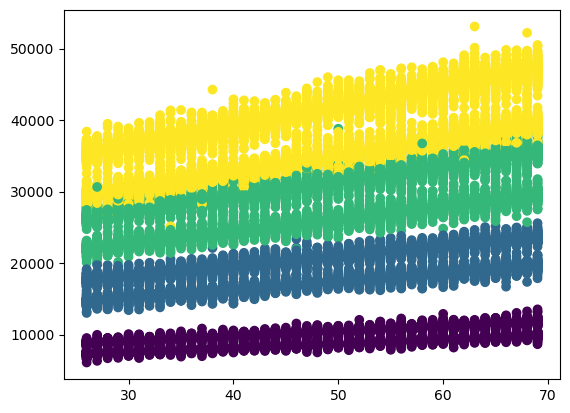

In [4]:
condition = age > 25
S = filter(salary, condition)
M = filter(Country_of_origin, condition)
A = filter(age, condition)

plt.scatter(A, S, c=M, cmap='viridis')

In [5]:
# create a pandas dataframe with the data
import pandas as pd


data = {"age" : age, "height" : height, "weight" : weight, "working" : working, "salary" : salary, "Country" : Country_of_origin, "gender" : gender}
df = pd.DataFrame(data)

# print the first 10 rows of the dataframe

print(df.head(10))

# print the mean salary of the people that are working

print("Mean salary of females that are working: ", np.mean(df["salary"][df["working"] == 1][df["gender"]=="F"]))
print("Mean salary of males that are working: ", np.mean(df["salary"][df["working"] == 1][df["gender"]=="M"]))


# save the dataframe to a csv file
df.to_csv("people.csv", index=False)

   age      height      weight  working        salary  Country gender
0   48  167.534114   67.487652      1.0  20816.290970        2      M
1   67  179.628861   65.549520      1.0  23525.841958        2      M
2   50  185.565212   66.892807      1.0  42163.300128        4      M
3   52  158.355926   66.162999      1.0  41982.835691        4      M
4   41  149.337921   66.337339      1.0  20105.926677        2      M
5   69  167.262527  105.432105      1.0  23945.756104        2      M
6   50  170.120442   69.476711      1.0  10424.004289        1      M
7   42  161.984187  101.092950      1.0  10039.949431        1      M
8   41  180.944589   75.752713      1.0  39509.146995        4      M
9   18  174.715214   73.830499      0.0     -8.351507        4      M
Mean salary of females that are working:  21121.738065556052
Mean salary of males that are working:  25421.50524528141


Controlling if numpy works:
2+2 = 5 (Orwell)
Controlling if pandas works:
Mean salary: 21464.49 =  21464.49
Controlling if matplotlib works:


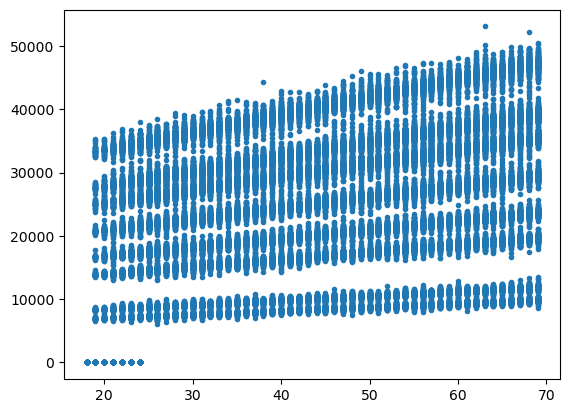

In [21]:
print("Controlling if numpy works:")
A = np.array([1, 2, 3, 4, 5])
B = np.array([5, 4, 3, 2, 1])

print("2+2 =", int(np.sum(A*B)/7), "(Orwell)")

print("Controlling if pandas works:")
df = pd.read_csv("people.csv")

print("Mean salary: 21464.49 = ", np.round(np.mean(df["salary"]),2))

print("Controlling if matplotlib works:")
plt.plot(df["age"], df["salary"], '.')